# 导入库

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input\tabular-playground-series-apr-2021\sample_submission.csv
/kaggle/input\tabular-playground-series-apr-2021\test.csv
/kaggle/input\tabular-playground-series-apr-2021\train.csv


# 载入数据

In [2]:
data = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2021/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [4]:
data.shape[0]

100000

# 数据分析及处理

## NaN值

In [5]:
for i in data.columns:
    print(i,":",data[str(i)].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 3292
SibSp : 0
Parch : 0
Ticket : 4623
Fare : 134
Cabin : 67866
Embarked : 250


#### 此时包含数值的列只有：Age和Fare
#### 其余列不包含数值
#### 在替换NaN之前，先看一下数值的分布

## 研究Age和Fare的分布

### Fare

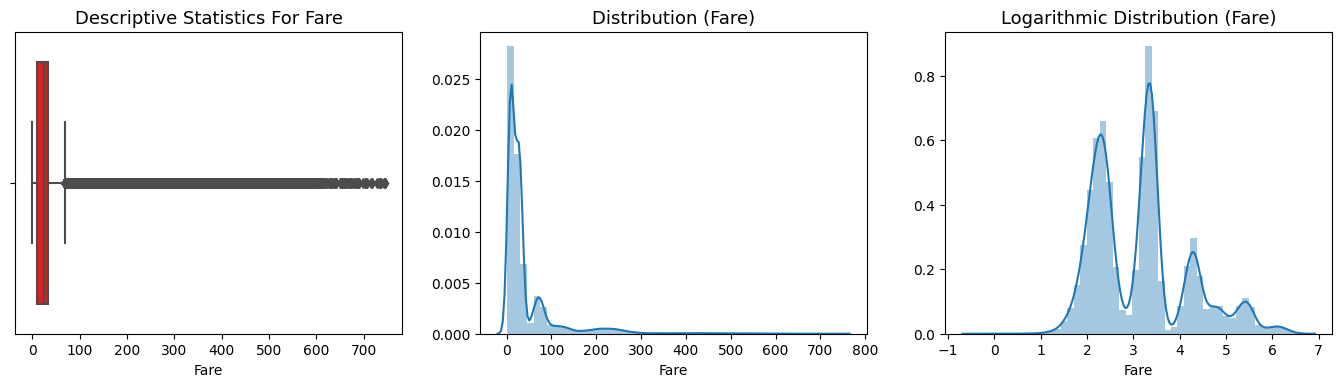

In [6]:
figure , axes = plt.subplots(ncols = 3 , figsize = (17,4) , dpi = 100)

sns.boxplot(x = 'Fare' , data = data , color = 'red' , ax = axes[0])
sns.distplot(x = data['Fare'] , ax = axes[1])
sns.distplot(x = data['Fare'].apply(np.log) , ax = axes[2])

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Fare')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title('Descriptive Statistics For Fare', fontsize=13)
axes[1].set_title('Distribution (Fare)', fontsize=13)
axes[2].set_title('Logarithmic Distribution (Fare)', fontsize=13)

plt.show()

#### 每个class的Fare分布情况

In [7]:
firstclass = data[data['Pclass'] == 1]
secondclass = data[data['Pclass'] == 2]
thirdclass = data[data['Pclass'] == 3]

##### First Class Fare

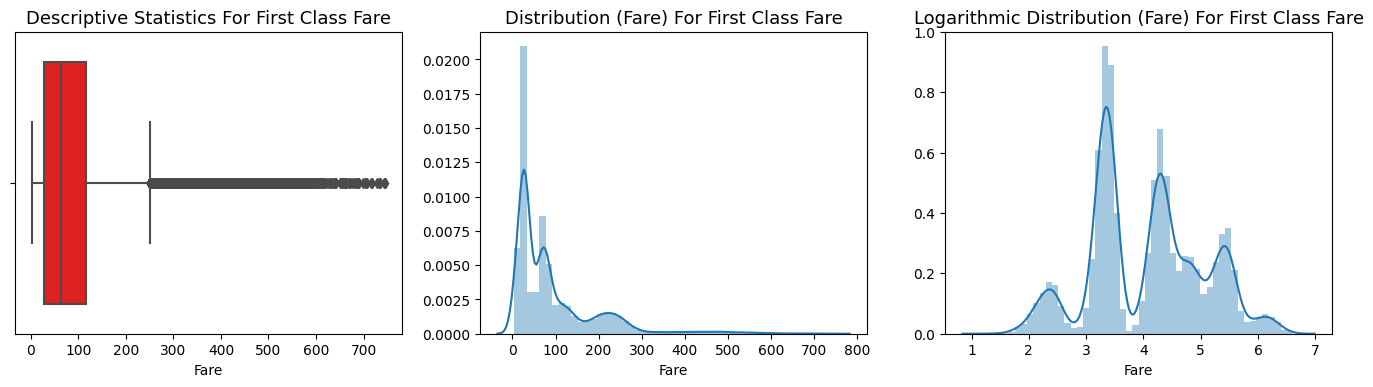

In [8]:
figure , axes = plt.subplots(ncols = 3 , figsize = (17,4) , dpi = 100)

sns.boxplot(x = firstclass['Fare'] , color = 'red' , ax = axes[0])
sns.distplot(x = firstclass['Fare'] , ax = axes[1])
sns.distplot(x = firstclass['Fare'].apply(np.log) , ax = axes[2])

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Fare')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title('Descriptive Statistics For First Class Fare', fontsize=13)
axes[1].set_title('Distribution (Fare) For First Class Fare', fontsize=13)
axes[2].set_title('Logarithmic Distribution (Fare) For First Class Fare', fontsize=13)

plt.show()

##### Second Class Fare

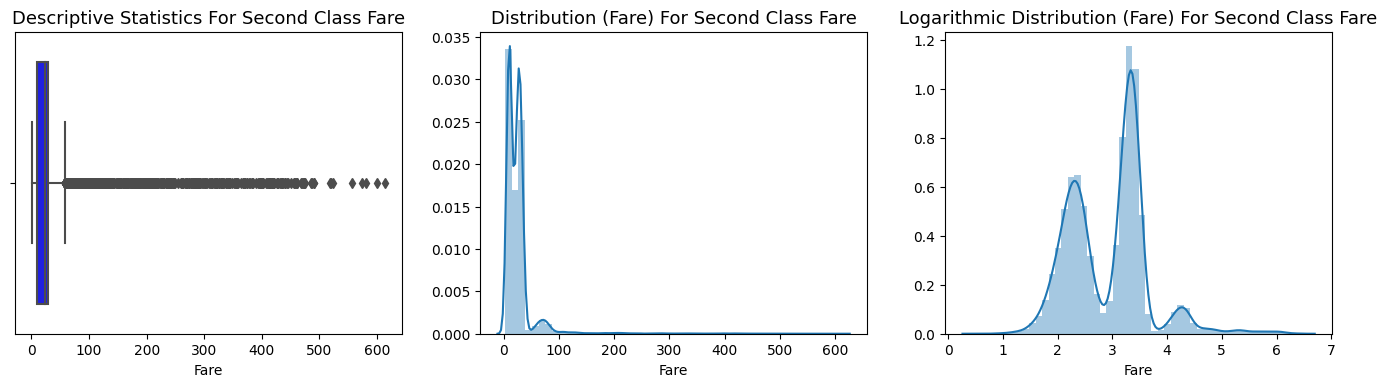

In [9]:
figure , axes = plt.subplots(ncols = 3 , figsize = (17,4) , dpi = 100)

sns.boxplot(x = secondclass['Fare'] , color = 'blue' , ax = axes[0])
sns.distplot(x = secondclass['Fare'] , ax = axes[1])
sns.distplot(x = secondclass['Fare'].apply(np.log) , ax = axes[2])

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Fare')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title('Descriptive Statistics For Second Class Fare', fontsize=13)
axes[1].set_title('Distribution (Fare) For Second Class Fare', fontsize=13)
axes[2].set_title('Logarithmic Distribution (Fare) For Second Class Fare', fontsize=13)

plt.show()

##### Third Class Fare

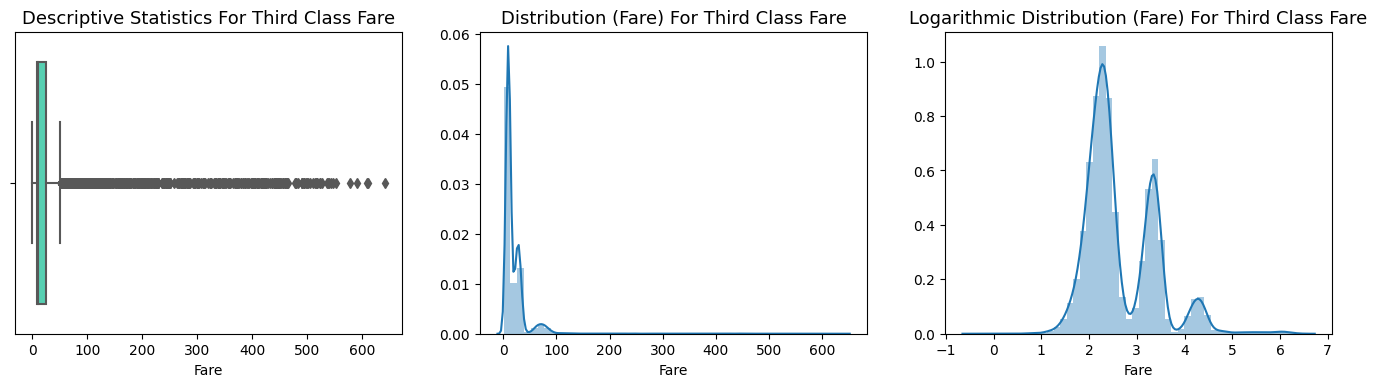

In [10]:
figure , axes = plt.subplots(ncols = 3 , figsize = (17,4) , dpi = 100)

sns.boxplot(x = thirdclass['Fare'] , color = '#42e3bb' , ax = axes[0])
sns.distplot(x = thirdclass['Fare'] , ax = axes[1])
sns.distplot(x = thirdclass['Fare'].apply(np.log) , ax = axes[2])

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Fare')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title('Descriptive Statistics For Third Class Fare', fontsize=13)
axes[1].set_title('Distribution (Fare) For Third Class Fare', fontsize=13)
axes[2].set_title('Logarithmic Distribution (Fare) For Third Class Fare', fontsize=13)

plt.show()

#### 由图看出Fare对于任何class来说没有固定的价格，所以打算对数据进行缩放，然后用平均值来估算

In [11]:
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()

### Age

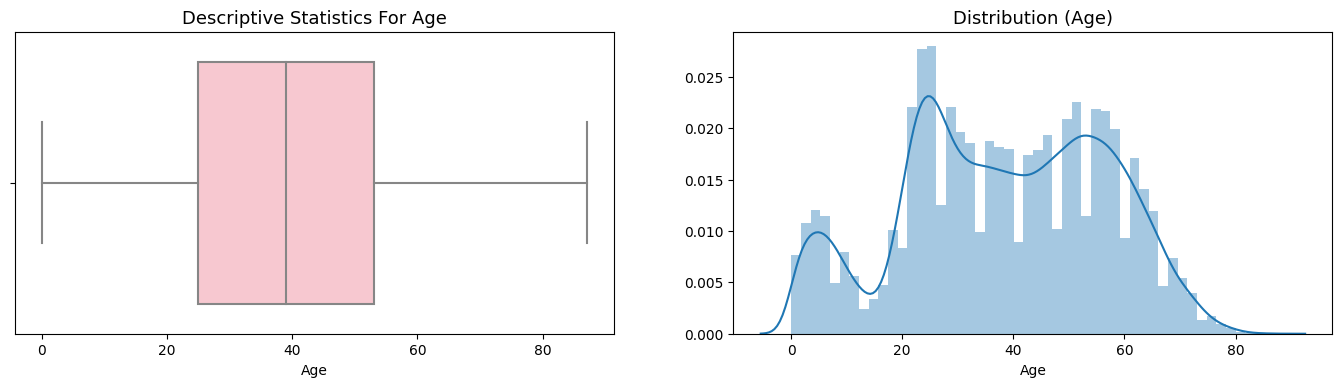

In [12]:
figure , axes = plt.subplots(ncols = 2 , figsize = (17,4) , dpi = 100)

sns.boxplot(x = 'Age' , data = data , color = 'pink' , ax = axes[0])
sns.distplot(x = data['Age'] , ax = axes[1])

for i in range(2):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('Age')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title('Descriptive Statistics For Age', fontsize=13)
axes[1].set_title('Distribution (Age)', fontsize=13)

plt.show()

#### 由图看出可用中位数来补全缺失值

In [13]:
data['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

#### 用K-最近邻（kNN）对Embarked来进行缺失插补

In [14]:
data['Embarked'].value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [15]:
embarked = {'S' : 0, 'C': 1, 'Q':2}
data['Embarked'] = data['Embarked'].map(embarked)

### 插补数据

In [16]:
impute = KNNImputer()
data['Embarked']= pd.Series(impute.fit_transform(data['Embarked'].values.reshape(-1,1)).reshape(1,-1).flatten())
data['Age'] = data['Age'].replace(np.nan,data['Age'].median())
data['Fare'] = data['Fare'].replace(np.nan,data['Fare'].mean())

In [17]:
for i in data.columns:
    print(i,":",data[str(i)].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 4623
Fare : 0
Cabin : 67866
Embarked : 0


# 与目标变量的转换和关联

In [18]:
sex = {'male':0,'female':1}
data['Sex'] = data['Sex'].map(sex)

In [19]:
train = data.drop(columns = ['Name','Ticket','Cabin','Survived'],axis = 1) #去除无关数据
test = data['Survived']

<AxesSubplot:title={'center':'Correlation with response variable'}>

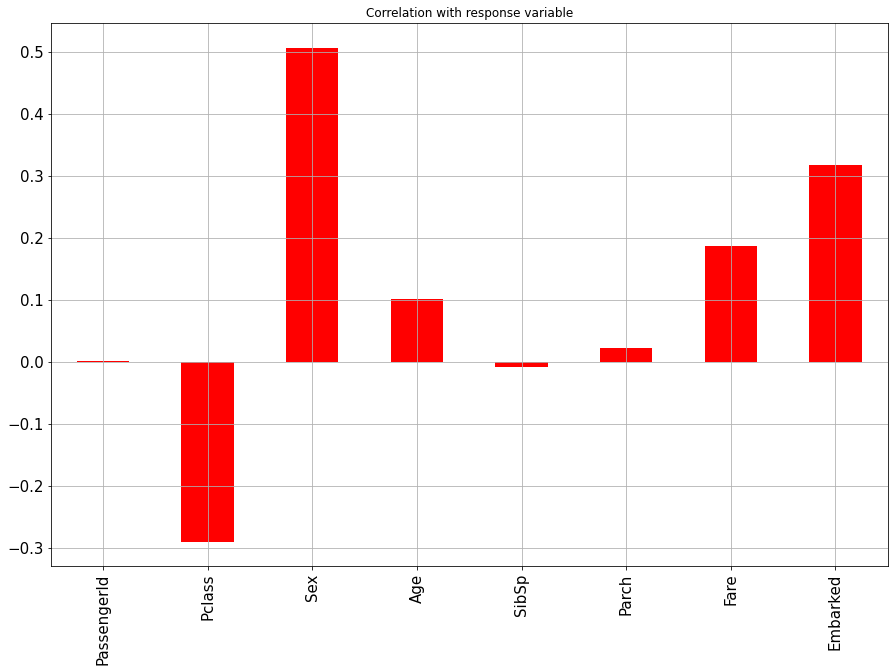

In [20]:
train.corrwith(test).plot.bar(figsize=(15,10),title="Correlation with response variable",fontsize=15,rot=90, color = 'red', grid=True )

#### 从中可以看出，与其他变量相比，SibSp、Parch、PassengerId的相关系数非常小，将删除这些变量

In [21]:
train.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)
train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [22]:
train.head()

,Pclass,Sex,Age,Fare,Embarked
0,1,0,39.00,-0.241265,0.0
1,3,0,39.00,-0.439429,0.0
2,3,0,0.33,0.393176,0.0
3,3,0,19.00,-0.443884,0.0
4,3,0,25.00,-0.519758,0.0


#### 同样缩放Age的数据，使所有变量都在几乎相同的范围内

In [23]:
train['Age'] = (train['Age'] - train['Age'].mean()) / train['Age'].std()
train.head()

,Pclass,Sex,Age,Fare,Embarked
0,1,0,0.034609,-0.241265,0.0
1,3,0,0.034609,-0.439429,0.0
2,3,0,-2.112537,0.393176,0.0
3,3,0,-1.075888,-0.443884,0.0
4,3,0,-0.742739,-0.519758,0.0


# ML模型实现

### 先分割它们，然后再拟合模型

In [24]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     11464
           1       0.70      0.74      0.72      8536

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



In [26]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     11464
           1       0.63      0.62      0.63      8536

    accuracy                           0.68     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.68      0.68      0.68     20000



In [27]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78     11464
           1       0.70      0.69      0.70      8536

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



In [28]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     11464
           1       0.66      0.66      0.66      8536

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



In [29]:
estimators = [('knn',KNeighborsClassifier()),('lr',LogisticRegression()),('dtr',DecisionTreeClassifier()),('rf',random_forest)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     11464
           1       0.72      0.72      0.72      8536

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



### 可以在测试数据上尝试堆叠分类器和逻辑回归

In [30]:
test_data = pd.read_csv("/kaggle/input/tabular-playground-series-apr-2021/test.csv")
for i in test_data.columns:
    print(i,":",test_data[str(i)].isnull().sum())

PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 3487
SibSp : 0
Parch : 0
Ticket : 5181
Fare : 133
Cabin : 70831
Embarked : 277


In [31]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Age'] = (test_data['Age'] - test_data['Age'].mean()) / test_data['Age'].std()
test_data['Fare'] = (test_data['Fare'] - test_data['Fare'].mean()) / test_data['Fare'].std()
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data['Embarked'] = test_data['Embarked'].map(embarked)
test_data['Embarked']= pd.Series(impute.fit_transform(test_data['Embarked'].values.reshape(-1,1)).reshape(1,-1).flatten())
test_data['Sex'] = test_data['Sex'].map(sex)
passengers = test_data['PassengerId']
test_data.drop(columns = ['PassengerId','Name','SibSp','Cabin','Ticket','Parch'], axis=1,inplace = True)

In [32]:
ans = lr.predict(test_data)
pd.DataFrame({'PassengerId' : passengers , 'Survived': ans}).to_csv("my_submission.csv",index=False)